## Production Run
- some benchmarking needed first
 
 Protocol files are copied from https://github.com/intbio/gmx_protocols/tree/master/amber into
Protocols folder.
If others are needed modify then in the folder.

In [1]:
#Libraries and main variables initialized
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.analysis.rms import rmsd
import numpy as np
import urllib.request, json
import os
import re
import nglview as nv
from funcs import get_files_from_git
from funcs import view_nucl
import panedr
import matplotlib.pyplot as plt

#Reloading funcs if changed
from importlib import reload 
import funcs,config
reload(funcs)
reload(config)



%matplotlib inline
from IPython.display import Markdown, display
from config import folder,descr,pname,ssh_host
display(Markdown(descr))
print("Folder set to: ",folder)
print("Project name: ",pname)
print("SSH host set to:",ssh_host)




# MD simulations of H3-H4 with 30 bp of DNA, tails truncated
- AMBER14SB force field
- 50 mM NaCl
- box 2nm


Folder set to:  h3-h4_tm_DNA
Project name:  h3-h4_tm_DNA
SSH host set to: lomo2g


In [2]:
#%%bash
#rm -rf MDProtocols

In [72]:
#Set protocols URL
#prot_url="https://api.github.com/repos/intbio/gmx_protocols/contents/amber"

In [73]:
#get_files_from_git(prot_url,'MDProtocols/')

## 7_Production run 10 000 ns - prepare files

In [2]:
%%bash  
#--out out --err err
mkdir -p GMX_run
gmx grompp -maxwarn 1 -f MDProtocols/7_prod.mdp -c GMX_run/6_equil.gro -p GMX_system/topol.top \
-o GMX_run/7_prod.tpr -v  -r GMX_run/6_equil.gro -n GMX_system/index.ndx -po GMX_run/mdout_7_prod.mdp -t GMX_run/6_equil.cpt

#It is useful to generate some files with different velovities for parallel runs
for i in `seq 0 15`; do
gmx grompp -maxwarn 1 -f MDProtocols/7_prod.mdp -c GMX_run/6_equil.gro -p GMX_system/topol.top \
-o GMX_run/7_prod_$i.tpr -v  -r GMX_run/6_equil.gro -n GMX_system/index.ndx -po GMX_run/mdout_7_prod.mdp -t GMX_run/6_equil.cpt
done

processing topology...
turning all bonds into constraints...
turning all bonds into constraints...
turning all bonds into constraints...
turning all bonds into constraints...
turning all bonds into constraints...
turning all bonds into constraints...
turning all bonds into constraints...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.836 nm, buffer size 0.036 nm
Set rlist, assuming 4x4 atom pair-list, to 0.801 nm, buffer size 0.001 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 112x112x112, spacing 0.116 0.116 0.116


gmx: Relink `/opt/miniconda3/envs/moldyn/bin/../lib/././libgfortran.so.4' with `/lib/x86_64-linux-gnu/librt.so.1' for IFUNC symbol `clock_gettime'
                      :-) GROMACS - gmx grompp, 2018.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess

In [1]:
%%bash
#For smaller diagnostic runs we also prepare file that will output trj every 10ps
gmx grompp -f MDProtocols/7_prod_10ps_out.mdp -c GMX_run/6_equil.gro -p GMX_system/topol.top \
-o GMX_run/7_prod_10ps_out.tpr -v  -r GMX_run/6_equil.gro -n GMX_system/index.ndx -po GMX_run/mdout_7_prod_10ps_out.mdp -t GMX_run/6_equil.cpt


#It is useful to generate some files with different velovities for parallel runs
for i in `seq 0 15`; do
gmx grompp -f MDProtocols/7_prod_10ps_out.mdp -c GMX_run/6_equil.gro -p GMX_system/topol.top \
-o GMX_run/7_prod_10ps_out_$i.tpr -v  -r GMX_run/6_equil.gro -n GMX_system/index.ndx -po GMX_run/mdout_7_prod_10ps_out.mdp -t GMX_run/6_equil.cpt

done

gmx: Relink `/opt/miniconda3/envs/moldyn/bin/../lib/././libgfortran.so.4' with `/lib/x86_64-linux-gnu/librt.so.1' for IFUNC symbol `clock_gettime'
                      :-) GROMACS - gmx grompp, 2018.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess

## Transfer files to Lomonosov-2

In [3]:
!ssh $ssh_host "mkdir -p ~/_scratch/$folder"

   Lomonosov-2 supercomputer welcomes you!




In [4]:
%%bash -s "$folder" "$ssh_host" --err err --out out
#Copy to SC

cp Run_scripts/lomo2_run.sh GMX_run/
cp Run_scripts/lomo2_run_cont.sh GMX_run/
rsync --exclude '*.xtc' --exclude '*.trr' -r GMX_run $2:~/_scratch/$1/;

## Launch,relaunch make a chain of tasks
### NOTE: for relaunch, monitor and data pullback - better to use status.ipynb

Lomonosov-2 queues https://users.parallel.ru/wiki/pages/22-config
compute partition allows max 7 days!.
Then we will resume.
https://hpc.nih.gov/docs/job_dependencies.html

In [39]:
#%%bash -s "$folder" --out out --err err
#ssh lomo2 "module load slurm gromacs/2018-gcc; cd ~/_scratch/$1/GMX_run; \
#sbatch -p test -t 00:15:00 -N 2 -J $1 lomo2_run.sh 7_prod"

In [5]:
%%bash -s "$folder" "$ssh_host"
#--out out --err err
ssh $2 "module load slurm gromacs/2018-gcc; cd ~/_scratch/$1/GMX_run; \
sbatch -p compute -t 7-00:00:00 -N 4 -J $1 lomo2_run.sh 7_prod"

Submitted batch job 968164


   Lomonosov-2 supercomputer welcomes you!




In [5]:
job_idp=906295

In [6]:
#Relaunch
#!ssh $ssh_host "module load slurm gromacs/2018-gcc; cd ~/_scratch/$folder/GMX_run; sbatch -p compute -t 7-00:00:00 -N 4 -J $folder lomo2_run_cont.sh 7_prod"

In [ ]:
%%bash -s "$folder" "$job_idp" "$ssh_host" --out out --err err 
#OR Make a relaunch chain

#ssh $3 "module load slurm gromacs/2018-gcc; cd ~/_scratch/$1/GMX_run; \
sbatch -p compute -t 7-00:00:00 -N 4 -J $1 --dependency=afterany:$2 lomo2_run_cont.sh 7_prod"

In [ ]:
print(err)

In [8]:
!ssh $ssh_host "module load slurm gromacs/2018-gcc; squeue -u \`whoami\`" || echo "No job in queue"

   Lomonosov-2 supercomputer welcomes you!


             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
            940106   compute h3-h4_tm gorkovet PD       0:00     13 (Resources)
            940107   compute h3-h4_tm gorkovet PD       0:00     14 (Resources)
            940109   compute h3-h4_tm gorkovet PD       0:00     15 (Resources)
            940110   compute h3-h4_tm gorkovet PD       0:00     16 (Resources)
            940111   compute h3-h4_tm gorkovet PD       0:00     17 (Resources)
            927312   compute h3-h4_tm gorkovet  R 1-13:07:10      4 n[51624-51627]
            936092   compute h3-h4_2_ gorkovet  R   23:07:00      8 n[49523-49530]
            939990   compute h3-h4_tm gorkovet  R      34:20      4 n[53317-53320]


## Monitor

Note: It is suggested that for monitoring and relaunch the user makes use of status.ipynb
Parts of conde below are deprecated.

In [5]:
job_idp=906295

In [7]:
%%bash -s "$folder"  "$job_idp" "$ssh_host"  --err err
# check job status
ssh $3 "tail -n 10 ~/_scratch/$1/GMX_run/egmx.$2"


Back Off! I just backed up 7_prod.xtc to ./#7_prod.xtc.1#

Back Off! I just backed up 7_prod.edr to ./#7_prod.edr.1#

NOTE: DLB will not turn on during the first phase of PME tuning
starting mdrun 'MDANALYSIS FRAME 0: Created by PDBWriter in water'
5000000000 steps, 10000000.0 ps.

NOTE: DLB can now turn on, when beneficial


In [8]:
%%bash -s "$folder"  "$job_idp"  "$ssh_host" --err err
# check job status
ssh $3 "tail -n 20 ~/_scratch/$1/GMX_run/7_prod.log"

    Kinetic En.   Total Energy  Conserved En.    Temperature Pres. DC (bar)
    2.02309e+05   -9.26729e+05   -3.03737e+06    3.01238e+02   -3.94498e+02
 Pressure (bar)   Constr. rmsd
   -1.85357e+01    2.56933e-05

DD  step 40489999 load imb.: force  2.5%

           Step           Time
       40490000    80980.00000

   Energies (kJ/mol)
          Angle    Proper Dih.  Improper Dih.          LJ-14     Coulomb-14
    5.79759e+03    8.62580e+03    3.13202e+02    3.05995e+03    1.43651e+04
        LJ (SR)  Disper. corr.   Coulomb (SR)   Coul. recip.      Potential
    1.61781e+05   -9.64980e+03   -1.32209e+06    9.51826e+03   -1.12827e+06
    Kinetic En.   Total Energy  Conserved En.    Temperature Pres. DC (bar)
    2.02373e+05   -9.25902e+05   -3.03785e+06    3.01333e+02   -3.95048e+02
 Pressure (bar)   Constr. rmsd
    2.55951e-01    2.58747e-05



### Pull back data for analysis

In [21]:
%%bash -s "$folder" "$ssh_host" --err err 
#Purge # files

ssh $2 "rm -f ~/_scratch/$1/GMX_run/\#*; ls ~/_scratch/$1/GMX_run/"

7_prod.cpt
7_prod.edr
7_prod.log
7_prod_prev.cpt
7_prod.tpr
7_prod.xtc
egmx.906286
egmx.906295
egmx.906331
lomo2_run_cont.sh
lomo2_run.sh
mdout_7_prod.mdp
ogmx.906286
ogmx.906295
ogmx.906331


In [22]:
%%bash -s "$folder" "$ssh_host" --err err --out out
#Get back data

rsync --partial $2:~/_scratch/$1/GMX_run/7_prod* GMX_run/ ;
rsync --partial $2:~/_scratch/$1/GMX_run/egmx* GMX_run/ ;    
rsync --partial $2:~/_scratch/$1/GMX_run/ogmx* GMX_run/ ;        

### Quick analysis 

Quick view

In [10]:
view_nucl('GMX_system/init_solv_ions.pdb','GMX_run/7_prod.xtc')

NGLWidget(count=266)

## QC analysis
### Let's look at energy, temperature pressure

Last Frame read : 132622, time : 265242.0 ps
132622 frame read in 53.77 seconds


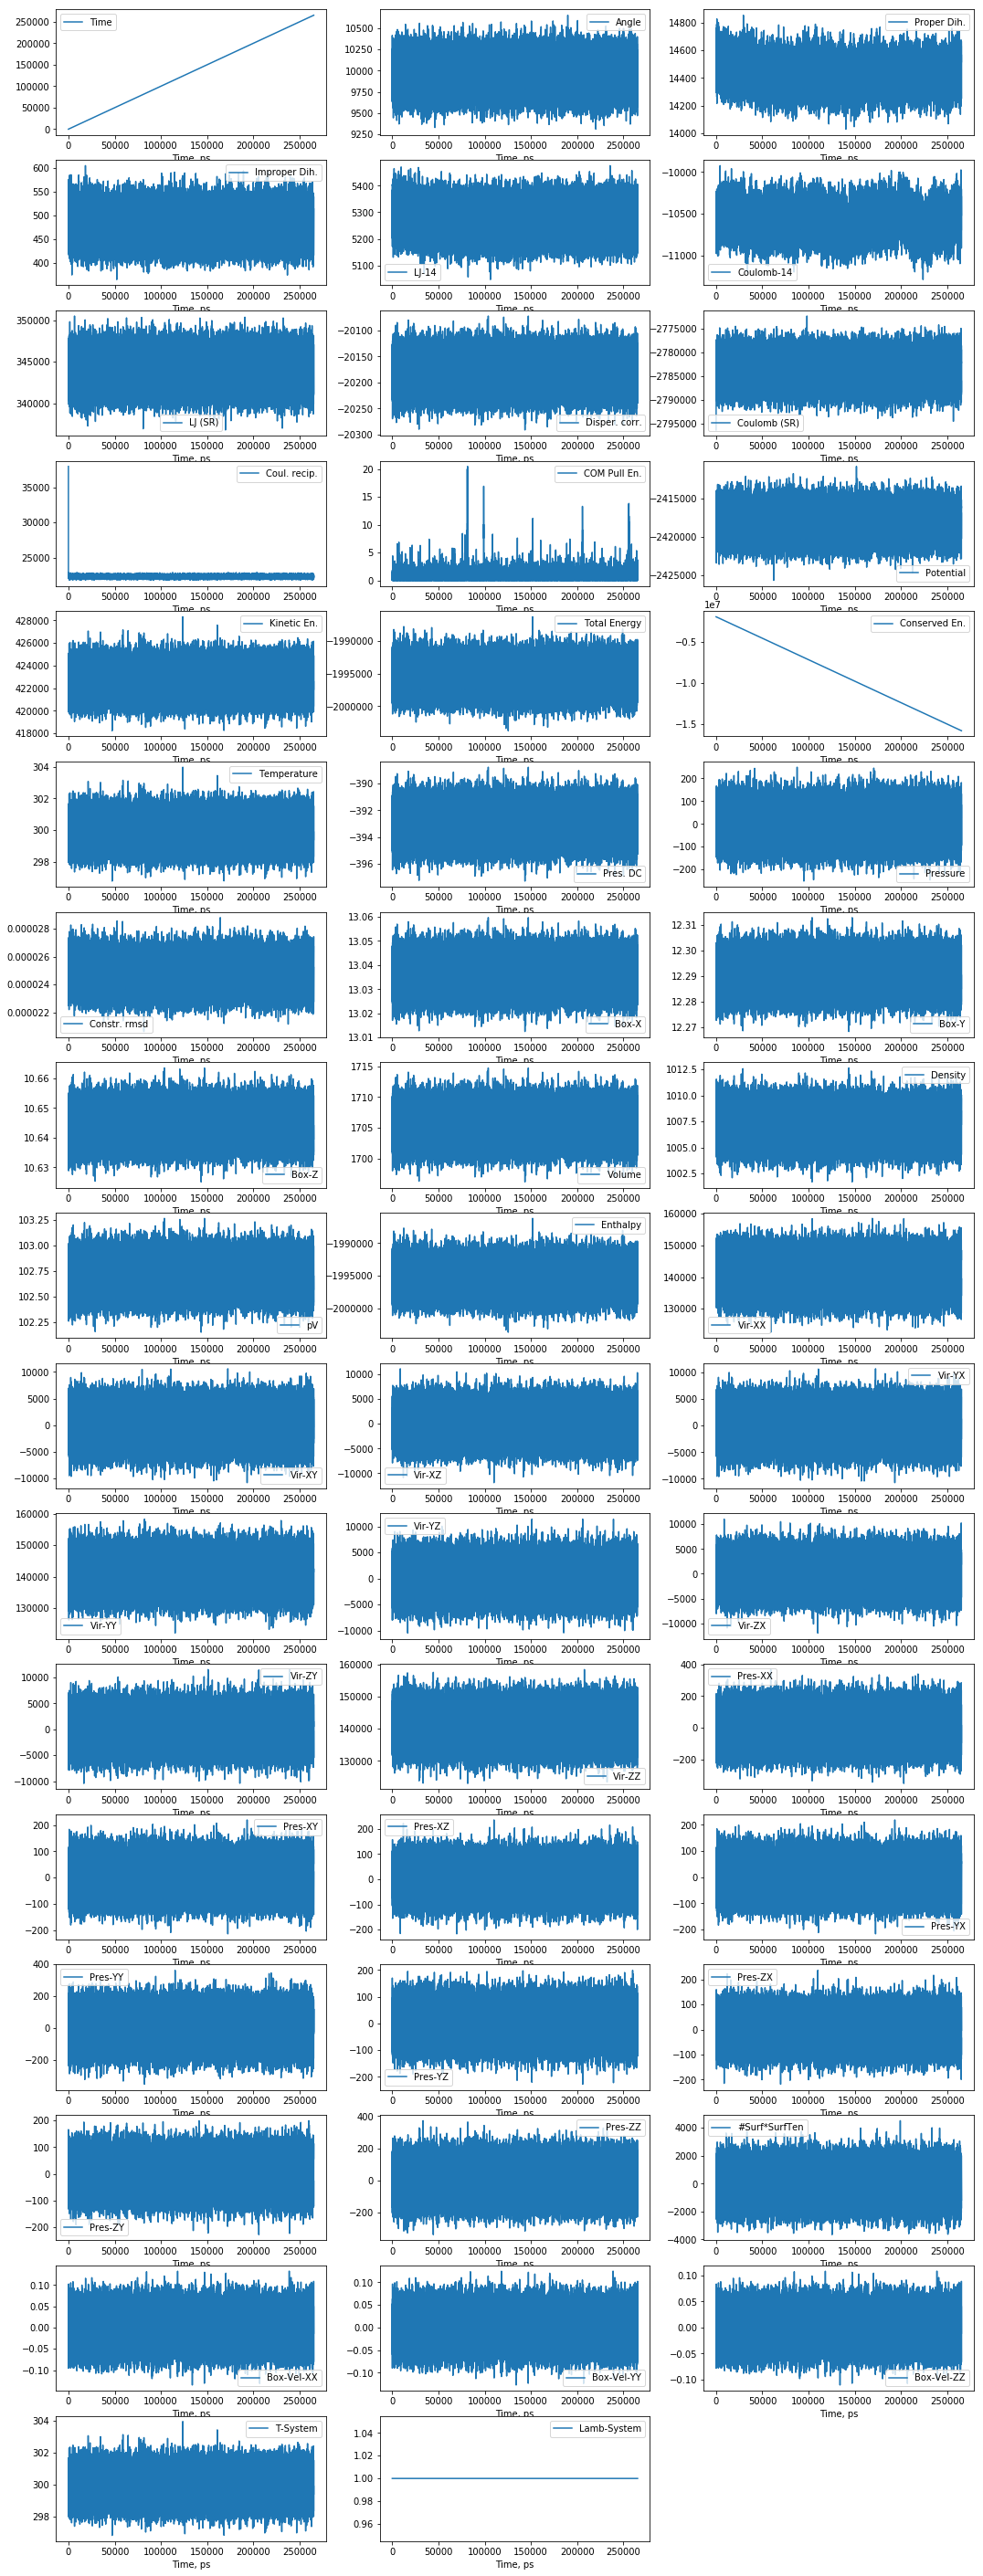

In [11]:

df = panedr.edr_to_df('GMX_run/7_prod.edr', verbose=True)
num_of_keys=len(df.keys())
grid=[1+num_of_keys//3,3]

plt.figure(figsize=(grid[1]*6,grid[0]*3))
plt.title('Mod')
for i,key in enumerate(df.keys(),1):
    ax=plt.subplot(*grid, i)
    ax.plot(df[key],label=key)
    ax.set_xlabel('Time, ps')
    ax.legend()    
plt.show()